In [10]:
import os
import librosa, librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [4]:
file = "blues.00000.wav"

In [5]:
signal, sr = librosa.load(file, sr=22050) #sr*T -> 600K

[]

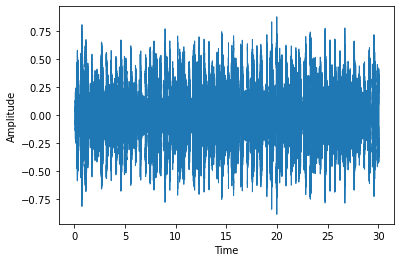

In [9]:
librosa.display.waveshow(signal, sr=sr)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.plot()

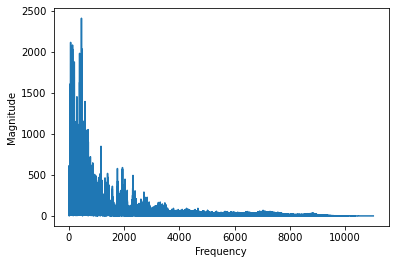

In [13]:
#Fourier Transform
fft = np.fft.fft(signal)
magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

magnitude = magnitude[:(int(len(magnitude)/2))]
frequency = frequency[:(int(len(frequency)/2))]
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.plot(frequency, magnitude)

#this plot only gives the frequency played throughout the song
#not as its played

#we need a stft for this

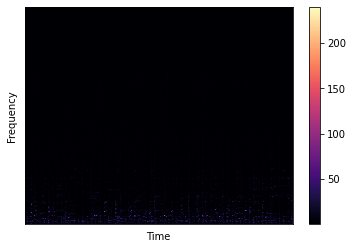

In [17]:
n_fft = 2048 #number of samples/fft
hop_length = 512 #amount we are shifting each FT 
#to the right

stft = librosa.core.stft(signal, hop_length=hop_length,
                        n_fft=n_fft)

spectogram = np.abs(stft)
librosa.display.specshow(spectogram, sr=sr, 
                         hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()

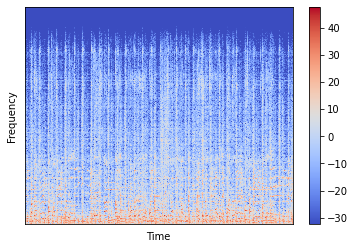

In [19]:
log_spectogram = librosa.amplitude_to_db(spectogram)
librosa.display.specshow(log_spectogram, sr=sr, 
                         hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()

/home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Pass y=[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  after removing the cwd from sys.path.


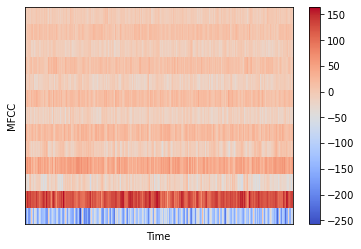

In [20]:
#MFCCs
MFCCs = librosa.feature.mfcc(signal, n_fft=n_fft,
                             hop_length=hop_length,
                            n_mfcc=13)
librosa.display.specshow(MFCCs, sr=sr, 
                         hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC")
plt.colorbar()